# Problem 1: Null distributions of a one-sample vs two sample t

We've spent a lot of time discussing the "null distribution".
- The null hypothesis for a 1 sample t test is that the mean of the normal population our data comes from is equal to our hypothesized mean, $\mu$. Therefore, the null distribution is the distribution of t values we expect to observe if we randomly sample from a normal population that has a mean equal to our hypothesized mean, $\mu$.
- The null hypothesis for a 2 sample t test can be more nuanced, depending on the assumptions we make about each samples standard deviations. Here, we will consider the independent, equal sample size, equal variance two-sample t test.

## Confirm we can calculate t correctly

Let's start by firsting making sure we can calculate t correctly. For this problem, let's use the heights of players (in centimeters) randomly selected from the LA Lakers and Boston Celtics rosters:

Lakers = [200, 210, 220,225,215];

Heat = [190, 220, 193, 200, 190];

In the space below, calculate the 1 sample t value for the Lakers, assuming their average height is 195 cm, and the two-sample t value for this data. Confirm your answers using ttest_1samp and ttest_ind. Be sure to **note** the technicality discussion on the last slide of Lecture 11.

In [1]:
#Lect 6 inclass
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import statsmodels.api as sm
from scipy.stats import gaussian_kde

Lakers = [200,210,220,225,215]
Heat = [190,220,193,200,190]

n=5
mu = 195

sp = np.sqrt(((np.std(Lakers, ddof=1))**2+(np.std(Heat, ddof=1))**2)/2)

t1 = ((np.mean(Lakers) - mu)*np.sqrt(n))/np.std(Lakers, ddof=1)

print(f'The one sample t-test value is t = {t1:0.2f}')


t2 = (np.mean(Lakers)-np.mean(Heat))/(sp*np.sqrt(2/n))

print(f'The two sample t-test value is t = {t2:0.2f}\n')

print("Stats tests done to confirm values:")
print(stats.ttest_1samp(Lakers, popmean=mu))
print(stats.ttest_ind(Lakers, Heat))

y = [Heat + Lakers]
#data array for both teams
Data = np.concatenate(y)

# x = [0,0,0,0,0,1,1,1,1,1]
# # x = np.c_[np.ones(10),x]

# Height = np.array([x,y])

# Height = np.column_stack(Height)

# model = sm.OLS(y,sm.add_constant(x)).fit()
# model.summary()

The one sample t-test value is t = 4.42
The two sample t-test value is t = 2.17

Stats tests done to confirm values:
Ttest_1sampResult(statistic=4.4174102722651325, pvalue=0.011534048799787354)
Ttest_indResult(statistic=2.167939197635687, pvalue=0.06201738353641719)


## Compare t distributions for 1 and 2 sample tests

- In the space below, write the code necessary to create null distributions for single and two-sample t tests when:
    - For the single sample t test, you are collecting 9 samples
    - For the two sample t test, you are collected 5 samples for each group.
- Produce density plots to compare the two distributions.
    - Be sure to select enough samples and to adjust bins sizes as needed so that the density plots are clear and stable (meaning each time you run it, you basically get the same answer).
    - Can use density feature of plt.hist or Seaborn's  sns function.
    - On the figure, clearly indicate the degrees of freedom for the specific t test
    - Unclear figures will not receive credit.


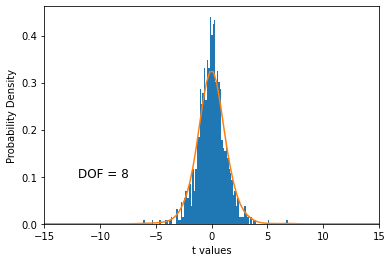

In [2]:
n=9
sigma = np.std(Lakers)

t = np.zeros(1000)
norm_data = np.random.normal(mu,sigma,10000);

#single sample t test
for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),n)
    t[m] = ((np.mean(tmp) - mu)*np.sqrt(n))/np.std(tmp, ddof=1)

DOF = n - 1
    
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);
    
density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.text(-12, 0.1, 'DOF = 8', fontsize = 12)
plt.show()

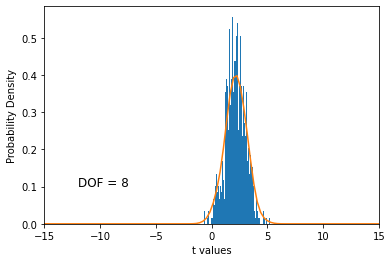

In [3]:
#two sample t test
n = 5
sigma1 = np.std(Lakers)
mean1 = np.mean(Lakers)
sigma2 = np.std(Heat)
mean2 = np.mean(Heat)

norm_data1 = np.random.normal(mean1,sigma1,10000);
norm_data2 = np.random.normal(mean2,sigma2,10000);

for m in np.arange(0,1000,1):
    tmp1 = random.sample(list(norm_data1),n)
    tmp2 = random.sample(list(norm_data2),n)
    t[m] = (np.mean(tmp1)-np.mean(tmp2))/(sp*np.sqrt(2/n))

#(np.sqrt(((np.std(tmp1, ddof=1))**2)/n1+((np.std(tmp2, ddof=1))**2)/n2))
#DOF = (sigma1**2/n1+sigma2**2/n2)**2/(sigma1**2/n1)**2/(n1-1)    

DOF = 2*n-2
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);

density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.text(-12, 0.1, 'DOF = 8', fontsize = 12)
plt.show()                                          

Based on your figure(s) above, how do the two distributions compare? **Comment here:**

## Compute p value for two-sample t test
- Using your null t distribution for your two sample t test, what is the likelihood that the heights of the Lakers and Heat come from populations with the same means?
- Check your answer using ttest_ind

In [4]:
n=5
t_val = (np.mean(Lakers)-np.mean(Heat))/(sp*np.sqrt(2/n))
print(f'The value of t from the Lakers/Heat heights is {t_val:0.2f}')
print("Looking at our plot, the odds of obtaining a t value that is less that or equal to our t value is P = 0.25\n")

print("The calculated p value using the stats library is:")
print(stats.ttest_ind(Lakers, Heat))
print("\nThe calcualted value differs from the value I've obtained looking at the chart, so I must have made an error somewhere.")

The value of t from the Lakers/Heat heights is 2.17
Looking at our plot, the odds of obtaining a t value that is less that or equal to our t value is P = 0.25

The calculated p value using the stats library is:
Ttest_indResult(statistic=2.167939197635687, pvalue=0.06201738353641719)

The calcualted value differs from the value I've obtained looking at the chart, so I must have made an error somewhere.


# Problem 2 Changing our data's distributions

As we've seen, we typically must assume that our data comes from a normal distribution. Let's use our brute force approach to determine how changing that assumption impacts our null t distributions.

- Below, create the null t distributions for a single-sample t test for n = 3, 8 and 30 when sampling from a normal distribution and a uniform distribution. 
- For each case, plot the density plots such that you can compare the distributions that result from sampling the normally and uniformally distributed data.
- Clearly label all figures.

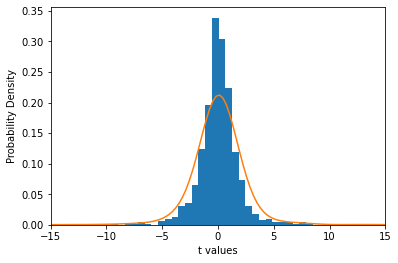

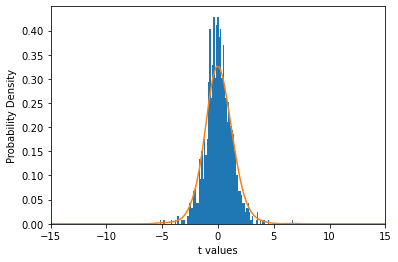

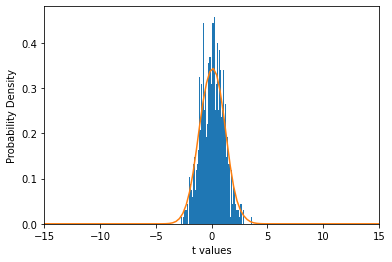

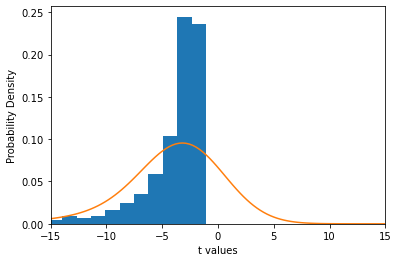

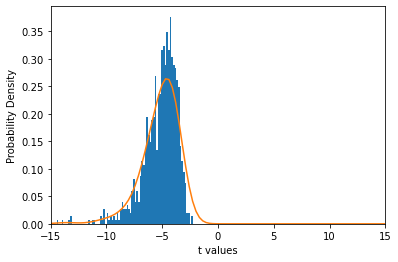

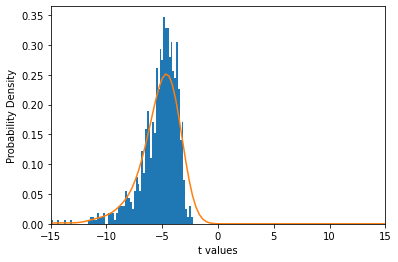

In [5]:
n=[3,8,30]

t = np.zeros(1000)
norm_data = np.random.normal(mu,sigma,10000);

#single sample t test normal dist n=3
for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),n[0])
    t[m] = ((np.mean(tmp) - mu)*np.sqrt(n[0]))/np.std(tmp, ddof=1)
    
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);

density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.show()  

#single sample t test normal dist n=8
for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),n[1])
    t[m] = ((np.mean(tmp) - mu)*np.sqrt(n[1]))/np.std(tmp, ddof=1)
    
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);

density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.show()  
    
#single sample t test normal dist n=30
for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),n[2])
    t[m] = ((np.mean(tmp) - mu)*np.sqrt(n[2]))/np.std(tmp, ddof=1)
    
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);

density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.show()  


norm_data = np.random.uniform(mu,sigma,10000);
    
#single sample t test uniform dist n=3
for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),n[0])
    t[m] = ((np.mean(tmp) - mu)*np.sqrt(n[0]))/np.std(tmp, ddof=1)
    
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);

density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.show()  

#single sample t test uniform dist n=8
for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),n[1])
    t[m] = ((np.mean(tmp) - mu)*np.sqrt(n[1]))/np.std(tmp, ddof=1)
    
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);

density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.show()  
    
#single sample t test uniform dist n=30
for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),n[1])
    t[m] = ((np.mean(tmp) - mu)*np.sqrt(n[1]))/np.std(tmp, ddof=1) 
    
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);

density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.show()  

**Comment here** on how changing distributions from which our data is collected impacts the null t distribution.

As you increase the value of n, both distributions have a much tighter density curve. When changing from a normal distrubution to a uniform distribution, there is a large deviation of the mean of the t values form zero. This means that are data generated is much less similar. 

# Problem 3 U statistic (i.e. no distribution assumptions)

One major concern is that we often know nothing about the data. We have no good reason to assume it is from a normal distribution. Instead, we have to use nonparametric statistical tools wherein we do not have to make any assumptions on whether our data comes from a specific population. One option is the U statistic from the Wilcoxon rank-sum test.

The assumption here is that two independent samples were selected from populations having the same distribution, but we don't know what that distribution is.

How to calculate U for small data sets (i.e. direct method)
- U is the number of “wins” between two competing datasets
- For each observation in one set, count the number of times this first value wins over any observations in the other set.
- Count 0.5 for any ties
- The sum of wins and ties is the U for that datasets
- To keep our discussion simple, we will ignore the case of ties

Here's a short example:
- Jason and Mr. N are competing. Jason scores a 100, 55, and 50. Mr. N scores a 90, 80, 60.
- Order the data by wins from highest to lowest and indicate who the score belongs to : J N N N J J
- We can calculate the U for Jason (call it U1) by adding the number of wins for each J entry. Namely, the first J beats N 3 times while the second and third J have no wins. So we get U1 = 3 + 0 + 0.
    - We can do the same calculation for Mr. N and get U2 = 2 + 2 + 2 = 6.
- Now, all we need to interpret these numbers is our absolute favorite thing: **a null distribution!!**

The null distribution for a U statistic is simply the score all of the **possible combinations of outcomes**. For example, if we only had two measurements for J and N, the possible combinations are:
   - JJBB (U1 = 4)
   - JBJB (U1 = 3)
   - JBBJ (U1 = 2)
   - BJBJ (U1 = 1)
   - BBJJ (U1 = 0)
   - BJJB (U1 = 2)

A histogram of the U1's above would be our null distribution. 

In the space below, wrote the code to construct the null distribution of U1 for when 5 samples are collected for each group. Hint: look for packages that can identify all combinations of two vectors...


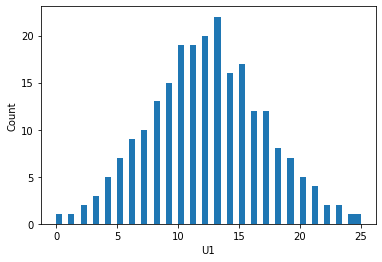

In [6]:
import itertools
import numpy as np
from itertools import product
from pprint import pprint

Data = list(itertools.product([0,1], repeat=10))
# print(np.sum(Data[0:4]))
x = 0
n = 0
NewData = []
for n in range(len(Data)):
    if np.sum(Data[n:n+1]) == 5:
        NewData[x:x+1] = Data[n:n+1]
        x = x+1

#from NewData take 0 and 1 as the two seperate groups. It can be seen that there is a pattern when calculating the U values
#this led me to get the following array when calculating U values with the pattern by hand
Udata = [0,1,2,3,4,5,2,3,4,5,6,4,5,6,7,6,7,8,8,9,10,3,4,5,6,7,5,6,7,8,9,10,11,6,7,8,9,8,9,10,10,11,12,9,10,11,11,12,13,12,13,10,13,12,13,14,15,4,5,6,7,8,6,7,8,9,8,9,10,10,11,12,7,8,9,10,9,10,11,11,12,13,10,11,12,13,8,9,10,11,10,11,12,12,13,14,11,12,13,13,14,15,14,15,16,17,12,13,14,14,15,15,16,17,18,16,17,18,19,20,5,6,7,8,9,7,8,9,10,9,10,11,11,12,13,8,9,10,11,10,11,12,12,13,14,11,12,13,13,14,15,14,15,16,17,9,10,11,12,13,11,12,13,14,13,14,15,15,16,12,13,14,14,15,15,16,17,18,13,14,15,15,16,17,16,17,18,19,17,18,19,20,21,10,11,12,13,12,13,14,15,16,13,14,15,15,16,17,16,17,18,19,15,16,17,17,18,19,18,19,20,21,19,20,21,22,23,20,21,22,23,24,25]
plt.hist(Udata, bins = 50)
plt.xlabel('U1')
plt.ylabel('Count')
plt.show()

You collect two samples:

a = (7,1,2,8,10)
b = (4,5,6,9,11)

Use your distribution to estimate the likelihood (two-sided p value) that a and b come from the same distributions.


In [7]:
array = [7,1,2,8,10,4,5,6,9,11]
array = np.sort(array)

#from this array calculate U value
R1 = 1+2+7+8+10
U1 = R1 - 5*6/2

print(f'The value of U1 is {U1}')

#so for 2 sided p test, go 6.5 in from each side
countforp = 9+7+5+3+2+1+1+8+6+5+2+2+1+1
P = countforp/np.sum(Udata)

print(f'The two sided p test value is {P}')

The value of U1 is 13.0
The two sided p test value is 0.018714689265536724
